In [1]:
from Assemblies.game import GameField
import numpy as np
from numpy import random
import time

%matplotlib inline
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

In [7]:
g = GameField(10, 1.1)
g.evolveQ.__doc__

'Evovle classic grid game.'

In [8]:
g.field

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [9]:
def calculate_density(size, game_type="T", percentage=10, tries=1, start=1, end=2, step=0.05, evol=100):

    b_points = np.arange(start, end, step)

    #densities = np.array([0.0 for b in b_points])
    densities = np.array([])
    
    for i in range(tries):
        random.seed(i)
        instance = np.array(random.rand(size, size) > 0.01 * percentage, dtype=int)

        density = np.array([])

        print("\n" + str(i) + " >", end="")
        for b in b_points:
            game = GameField(size, b)
            game.field = np.copy(instance)
            
            if game_type == "T":
                game.evolveT(evol)
            elif game_type == "Q":
                game.evolveQ(evol)
                
            print("*", end="")
            density = np.append(density, [[(np.count_nonzero(1 - game.field) / size**2)]])


        densities = np.append(densities, density)

    return densities.reshape(tries, -1)

### Configuration:
* Size: 210
* Tries: 10
* Evolution steps: 250
* b = [1, 2), step = 0.02

In [10]:
densitiesT = calculate_density(210, step=0.05, evol=250, tries=10, game_type="T")


0 >********************
1 >***

KeyboardInterrupt: 

In [21]:
densitiesQ = calculate_density(210, step=0.02, evol=250, tries=10, game_type="Q")


0 >**************************************************
1 >**************************************************
2 >**************************************************
3 >**************************************************
4 >**************************************************
5 >**************************************************
6 >**************************************************
7 >**************************************************
8 >**************************************************
9 >**************************************************

In [22]:
avr_densitiesT = sum(densitiesT) / len(densitiesT)

errsT = np.array([])
for i in range(len(avr_densitiesT)):
    errT = np.sqrt( sum((avr_densitiesT[i] - densitiesT[::, i])**2) / len(avr_densitiesT) )
    errsT = np.append(errsT, errT) 

In [23]:
avr_densitiesQ = sum(densitiesQ) / len(densitiesQ)

errsQ = np.array([])
for i in range(len(avr_densitiesQ)):
    errQ = np.sqrt( sum((avr_densitiesQ[i] - densitiesQ[::, i])**2) / len(avr_densitiesQ) )
    errsQ = np.append(errsQ, errQ) 

<ErrorbarContainer object of 3 artists>

<Figure size 432x288 with 0 Axes>

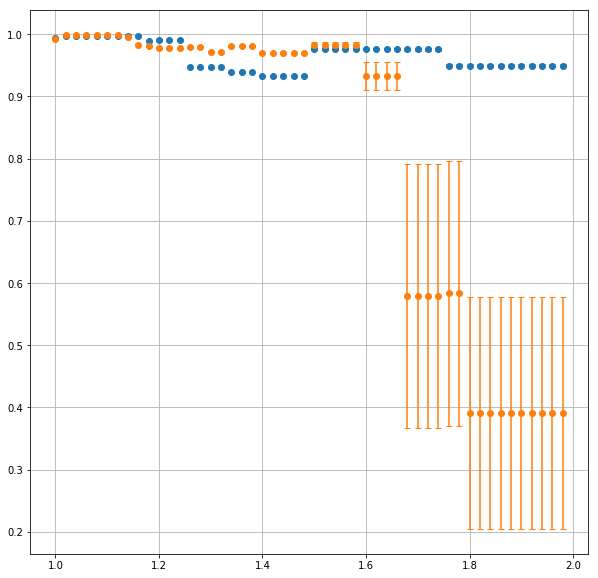

In [25]:
b_points = np.arange(1, 2, 0.05)

scale = 10
plt.clf()
plt.figure(figsize = (scale, scale))
plt.grid(True)

plt.errorbar(b_points, avr_densitiesT, yerr=errsT, fmt='o', capsize=3)
plt.errorbar(b_points, avr_densitiesQ, yerr=errsQ, fmt='o', capsize=3)